<a href="https://colab.research.google.com/github/alexanderbeleno16/implementacion_gradiente_gbm/blob/main/implementacion_gradiente_GBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPLEMENTACIÓN**

## CORPORACIÓN UNIVERSITARIA LATINOAMERICANA

### PRESENTADO POR:

### ALEXANDER BELEÑO, VANESSA BAENA, ANDREA ORELLANO, STIVEN MORALES


## **INFORMACIÓN RELACIONADA AL DATASET**


El dataset proporciona información sobre las tarifas y costos de la energía eléctrica ofrecidos por Empresas Públicas de Medellín E.S.P. (EPM) en el mercado regulado. Cubre el periodo de diciembre de 2016 a diciembre de 2021.

## **REFERENCIA DEL DATASET**
https://www.datos.gov.co/Funci-n-p-blica/Tarifas-para-Servicios-de-Energ-a-EPM/sfcd-b3ey/data_preview


## **IMPORTACIÓN DE LIBRERIAS**
En esta sección del código se realizan las importaciones correspondientes a cada librería que permitiran la realización exitosa de la lectura y el tratamiento de los datos del archivo ".csv".

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Pandas (pd):** Para manipulación y análisis de datos, nos ofrece los dataframe.

**NumPy (np):** Para operaciones Matematicas/numéricas.

**Matplotlib.pyplot (plt):** Para crear gráficos/visualizaciones de datos.

## **CARGUE Y LECTURA DEL ARCHIVO CSV**
En esta sección del código se carga los datos del archivo CSV en un objeto llamado data_frame

In [189]:
data_frame = pd.read_csv('drive/MyDrive/files/Tarifas_para_Servicios_de_Energia_EPM.csv')

## **Métodos básicos para el análisis de la información**

### **info()**
Proporciona información sobre el DataFrame, incluyendo el número de filas y columnas, los tipos de datos en cada columna y la cantidad de memoria utilizada.

In [190]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3622 entries, 0 to 3621
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tipo de Información    3622 non-null   object 
 1   Tipo de Tarifa         3622 non-null   object 
 2   Tipo de Dato           3622 non-null   object 
 3   Rango de Consumo       1480 non-null   object 
 4   Nivel                  3622 non-null   object 
 5   Propiedad Epm          3621 non-null   float64
 6   Compartido             3621 non-null   float64
 7   Propiedad del Cliente  3621 non-null   float64
 8   Punta                  3621 non-null   float64
 9   Fuera de Punta         3621 non-null   float64
 10  Año                    3621 non-null   float64
 11  Mes                    3621 non-null   object 
dtypes: float64(6), object(6)
memory usage: 339.7+ KB


### **describe()**
Calcula estadísticas descriptivas para cada columna numérica, como media, desviación estándar, mínimo, máximo, etc.

In [191]:
data_frame.describe()

,Propiedad Epm,Compartido,Propiedad del Cliente,Punta,Fuera de Punta,Año
count,3621.000000,3621.000000,3621.000000,3621.000000,3621.000000,3621.000000
mean,178.890942,228.680370,165.393888,85.006319,71.466929,2018.938415
std,236.586156,3413.972102,218.177223,1029.674587,734.070706,1.458379
min,-1.610000,-1.610000,-1.610000,-1.610000,0.000000,2016.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2018.000000
50%,35.200000,35.100000,35.200000,0.000000,0.000000,2019.000000
75%,426.480000,414.620000,398.880000,39.750000,36.950000,2020.000000
max,742.140000,205151.000000,681.960000,43577.000000,43577.000000,2021.000000


### **head()**
Muestra las primeras filas del DataFrame, lo que permite una vista previa rápida de los datos.

In [192]:
data_frame.head()

,Tipo de Información,Tipo de Tarifa,Tipo de Dato,Rango de Consumo,Nivel,Propiedad Epm,Compartido,Propiedad del Cliente,Punta,Fuera de Punta,Año,Mes
0,Monomia,Residencial,Estrato 1,Rango 0 - CS,I,228.08,218.81,209.54,0.0,0.0,2020.0,Diciembre
1,Monomia,Residencial,Estrato 1,Rango > CS,I,570.20,547.02,523.85,0.0,0.0,2020.0,Diciembre
2,Monomia,Residencial,Estrato 2,Rango 0 - CS,I,285.10,273.51,261.92,0.0,0.0,2020.0,Diciembre
3,Monomia,Residencial,Estrato 2,Rango > CS,I,570.20,547.02,523.85,0.0,0.0,2020.0,Diciembre
4,Monomia,Residencial,Estrato 3,Rango 0 - CS,I,484.67,464.97,445.27,0.0,0.0,2020.0,Diciembre


### **unique()**
Obtiene los valores unicos de una columna en especifico.

In [193]:
data_frame['Mes'].unique()

array(['Diciembre', 'Marzo', 'Enero', 'Mayo', 'Febrero', 'Julio', 'Abril',
       'Noviembre', 'Junio', 'Agosto', 'Septiembre', 'Octubre', nan],
      dtype=object)

## **Gráficos**


### Gráfico de Bigote

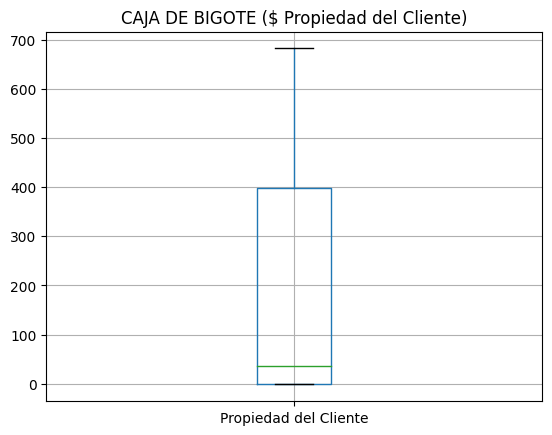

In [194]:
data_frame.boxplot(column='Propiedad del Cliente')
plt.title('CAJA DE BIGOTE ($ Propiedad del Cliente)')
# plt.ylabel('Registros')
plt.show()

### Histograma

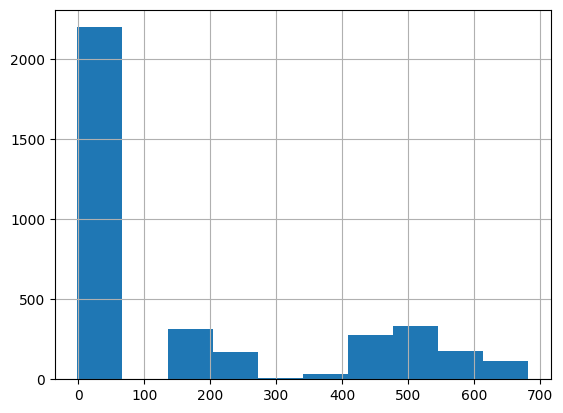

In [195]:
data_frame.loc[:, 'Propiedad del Cliente'].hist(bins=10)
plt.show()

## Valores Faltantes/Nulos
Se obtiene por columna la cantidad de registros con valores nulos

In [196]:
print(data_frame.isnull().sum())

Tipo de Información         0
Tipo de Tarifa              0
Tipo de Dato                0
Rango de Consumo         2142
Nivel                       0
Propiedad Epm               1
Compartido                  1
Propiedad del Cliente       1
Punta                       1
Fuera de Punta              1
Año                         1
Mes                         1
dtype: int64


## Preprocesamiento
Filtrar por cada columna, todos los valores nulos para luego reemplazarlos por la moda de cada columna correspondiente

In [197]:
# Para manejar los valores faltantes, puedes eliminar las filas con valores faltantes
# data_frame_sin_nulos = data_frame.dropna()

# O imputar los valores faltantes con un valor específico, como la media(Promedio) de la columna
# data_frame.fillna(data_frame.mean(), inplace=True)
# data_frame.fillna(data_frame.median(), inplace=True)
data_frame.fillna(data_frame.mode().iloc[0], inplace=True)

print(data_frame.isnull().sum())

Tipo de Información      0
Tipo de Tarifa           0
Tipo de Dato             0
Rango de Consumo         0
Nivel                    0
Propiedad Epm            0
Compartido               0
Propiedad del Cliente    0
Punta                    0
Fuera de Punta           0
Año                      0
Mes                      0
dtype: int64
